# Pymaceuticals Inc.
---

### Analysis

- '# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.'  .duplicated https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

- '# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen'  .agg  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
 
- '# Calculate the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin' .isin  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

- '# Start by getting the last (greatest) timepoint for each mouse  .idxmax()   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html

- '# Determine outliers using upper and lower bounds  .tolist()  https://www.geeksforgeeks.org/python-pandas-series-tolist/


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_study_info= pd.merge(mouse_metadata, study_results, how= "right", on= ["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_study_info.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_ids=complete_study_info["Mouse ID"]

mice_count=len(mice_ids)

mice_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids= complete_study_info[complete_study_info.duplicated(["Mouse ID", "Timepoint"])]

duplicate_ids_list= duplicate_ids["Mouse ID"].unique()

duplicate_ids_list

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
360,g989,Propriva,Female,21,26,5,47.570392,0
681,g989,Propriva,Female,21,26,10,49.880528,0
869,g989,Propriva,Female,21,26,15,53.442020,0
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_study_info.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first", inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_ids=complete_study_info["Mouse ID"]
 
mice_count=len(mice_ids)

mice_count

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drug_Regimens= complete_study_info.groupby("Drug Regimen")

mean= Drug_Regimens["Tumor Volume (mm3)"].mean()
median= Drug_Regimens["Tumor Volume (mm3)"].median()
variance= Drug_Regimens["Tumor Volume (mm3)"].var()
std_dev= Drug_Regimens["Tumor Volume (mm3)"].std()
sem= Drug_Regimens["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary_Statistics=pd.DataFrame({"Mean": mean, 
                            "Median":median, 
                            "Variance":variance, 
                            "STD": std_dev, 
                            "SEM": sem})
Summary_Statistics

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
Summary_Statistics_AGG= complete_study_info.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
Summary_Statistics_AGG

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

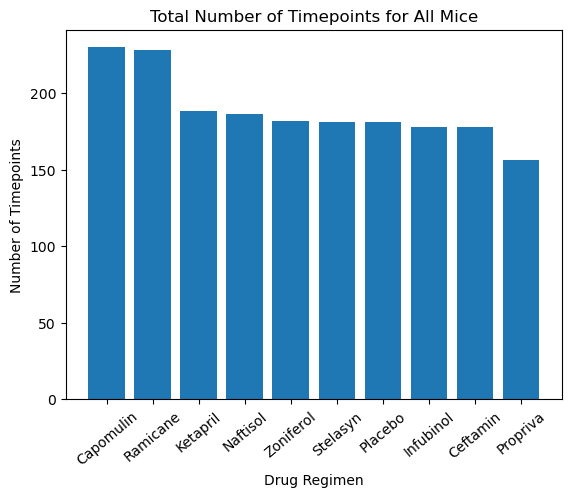

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts= complete_study_info["Drug Regimen"].value_counts()

drug_regimens_count= counts.index
timepoint_count= counts.values

plt.bar(drug_regimens_count,timepoint_count)

plt.title("Total Number of Timepoints for All Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.xticks(rotation=40)

plt.show()

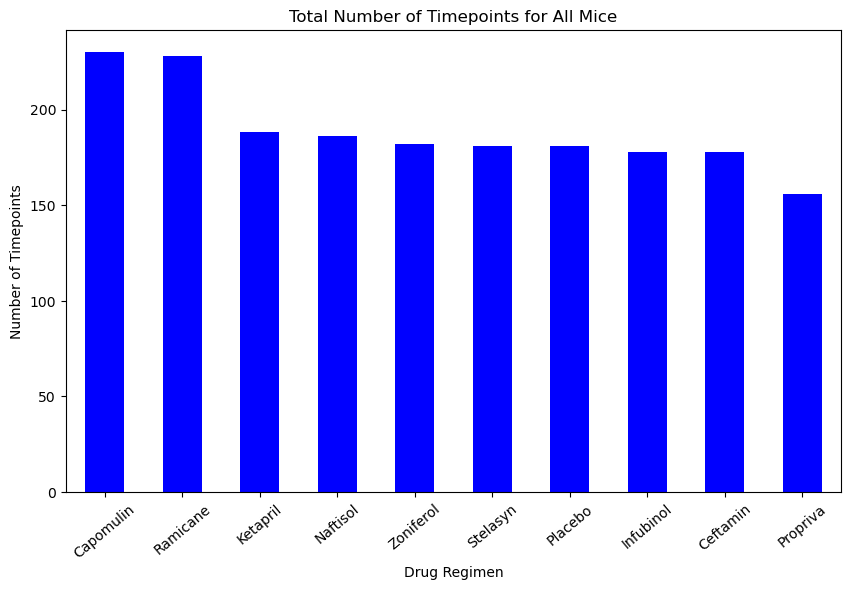

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts= complete_study_info["Drug Regimen"].value_counts()


figure= counts.plot(kind="bar",
                         figsize=(10,6), 
                         title="Total Number of Timepoints for All Mice", 
                         xlabel= "Drug Regimen", 
                         ylabel="Number of Timepoints", 
                         color="blue")



plt.xticks(rotation=40)

plt.show()

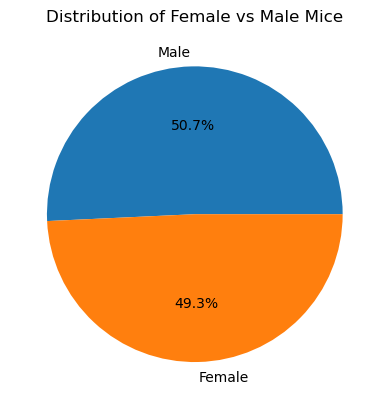

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts= complete_study_info["Sex"].value_counts()

plt.pie(sex_counts, labels=sex_counts.index, autopct= "%1.1f%%")

plt.title("Distribution of Female vs Male Mice")

plt.show()

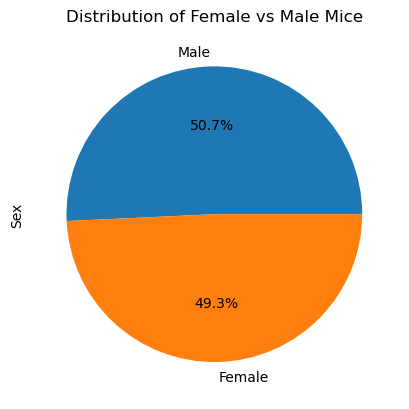

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts= complete_study_info["Sex"].value_counts()

sex_counts.plot(kind="pie", title=("Distribution of Female vs Male Mice"),autopct= "%1.1f%%")           

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
specified_study_info= complete_study_info[complete_study_info["Drug Regimen"].isin(drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoints= specified_study_info.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].idxmax()
greatest_timepoints_df= specified_study_info.loc[greatest_timepoints].reset_index()
greatest_timepoints_df=greatest_timepoints_df.rename(columns={"Timepoint": "Greatest Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
specified_study_with_timepoints= pd.merge(complete_study_info, greatest_timepoints_df[['Mouse ID', 'Drug Regimen', 'Greatest Timepoint']], on=["Mouse ID", "Drug Regimen"])
specified_study_with_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
0,b128,Capomulin,Female,9,22,0,45.000000,0,45
1,b128,Capomulin,Female,9,22,5,45.651331,0,45
2,b128,Capomulin,Female,9,22,10,43.270852,0,45
3,b128,Capomulin,Female,9,22,15,43.784893,0,45
4,b128,Capomulin,Female,9,22,20,42.731552,0,45
...,...,...,...,...,...,...,...,...,...
809,m601,Capomulin,Male,22,17,25,33.118756,1,45
810,m601,Capomulin,Male,22,17,30,31.758275,1,45
811,m601,Capomulin,Male,22,17,35,30.834357,1,45
812,m601,Capomulin,Male,22,17,40,31.378045,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    subset = complete_study_info.loc[complete_study_info["Drug Regimen"] == drug, :]
    
    quartiles = subset["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q2= quartiles[0.5]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = complete_study_info.loc[complete_study_info["Drug Regimen"] == drug, ["Mouse ID", "Tumor Volume (mm3)"]]
    
    
    # add subset 
    tumor_volumes.append(subset["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    outliers = subset.loc[(subset["Tumor Volume (mm3)"] < lower_bound) | (subset["Tumor Volume (mm3)"] > upper_bound), "Tumor Volume (mm3)"]
    print(f"{drug} potential outliers: {outliers.tolist()}")

Capomulin potential outliers: [25.47214326, 23.34359787]
Ramicane potential outliers: [22.05012627]
Infubinol potential outliers: []
Ceftamin potential outliers: []


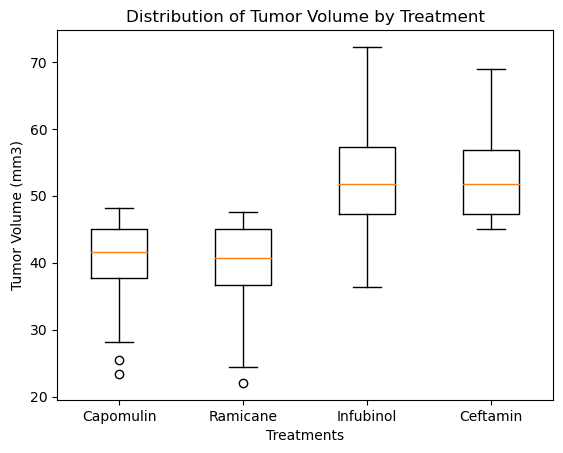

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax= plt.subplots()

ax.boxplot(tumor_volumes, labels=treatments)

ax.set_xlabel("Treatments")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Distribution of Tumor Volume by Treatment")

plt.show()

## Line and Scatter Plots

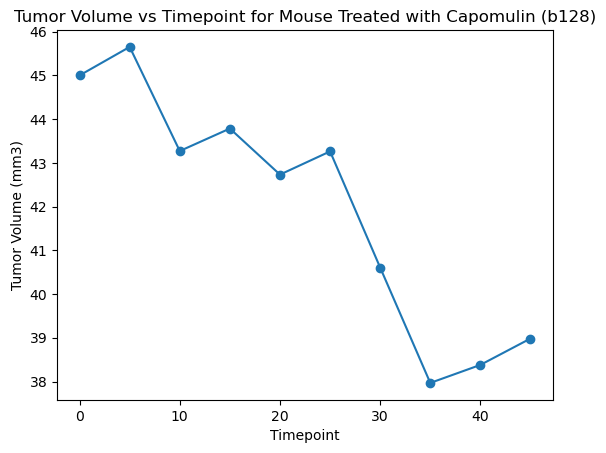

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = complete_study_info.loc[complete_study_info["Drug Regimen"] == "Capomulin", :]
capomulin_mouse = "b128"
mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == capomulin_mouse, :]

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs Timepoint for Mouse Treated with Capomulin ({capomulin_mouse})")
plt.show()

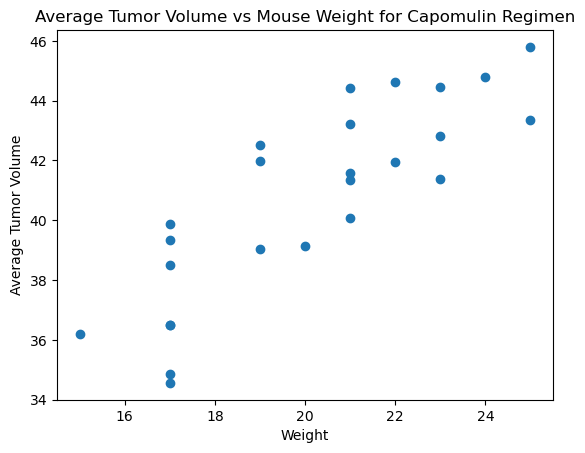

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_Capomulin_tumor_vol= capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_Capomulin_mouse_weight= capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(avg_Capomulin_mouse_weight, avg_Capomulin_tumor_vol)
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Regimen")
plt.show()

## Correlation and Regression

Correlation coefficient: 0.841936342469472


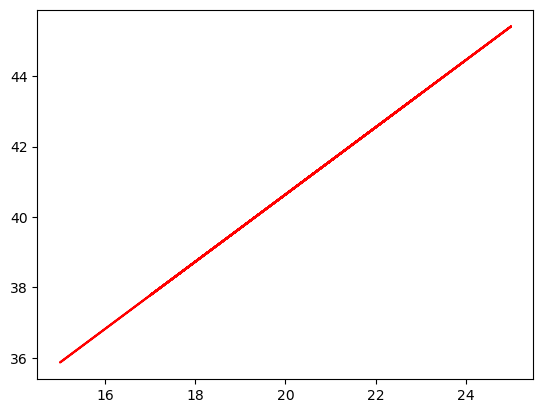

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Corr_coefficient = st.pearsonr(avg_Capomulin_mouse_weight, avg_Capomulin_tumor_vol)
print(f"Correlation coefficient: {Corr_coefficient[0]}")

slope, intercept, rvalue, pvalue, stderr= st.linregress(avg_Capomulin_mouse_weight, avg_Capomulin_tumor_vol)

regress_values= slope* avg_Capomulin_mouse_weight+ intercept

plt.plot(avg_Capomulin_mouse_weight, regress_values, color="red")

plt.show()

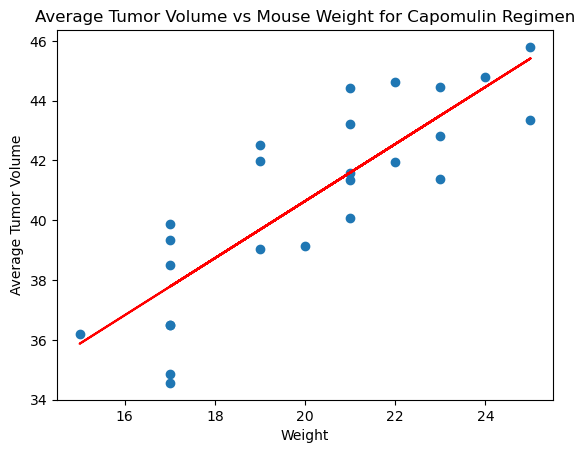

In [20]:
#combined scatter and regress line plots
plt.scatter(avg_Capomulin_mouse_weight, avg_Capomulin_tumor_vol)

plt.plot(avg_Capomulin_mouse_weight, regress_values, color="red")

plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Regimen")

plt.show()